In [0]:
#coding: utf-8

import pandas as pd
from nltk.tokenize import TweetTokenizer
from collections import Counter
from prettytable import PrettyTable
import matplotlib.pyplot as matplot
import seaborn
import nltk
from collections import OrderedDict

In [0]:
textData = pd.read_csv('https://raw.githubusercontent.com/llvieira/ri_lab_01/master/reports/results.csv')['text'].tolist()

tknzr = TweetTokenizer()

**Q1) Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção**


In [23]:
textTokenized = []

for i in range(len(textData)):
  allWordsInRow = tknzr.tokenize(textData[i].lower())
  allWords = [word for word in allWordsInRow if(len(word)) >= 3]
  textTokenized.extend(allWords)
  
frequencyWords = Counter(textTokenized)
countWords1000 = 0
countWords1 = 0

for wordFrequency in frequencyWords.values():
  if(wordFrequency > 1000):
    countWords1000 += 1
  elif(wordFrequency == 1):
    countWords1 += 1


vocabularySize = len(frequencyWords)
totalWords = len(textTokenized)
totalDocuments = len(textData)

namesAndValues = OrderedDict({'Words occurring > 1000 times': countWords1000, 
                              'Vocabulary size': vocabularySize, 
                              'Total documents': totalDocuments,
                              'Total word occurrences': totalWords, 
                              'Words occurring once': countWords1})

table = PrettyTable(['Statistic', 'Value'])

for name, value in namesAndValues.items():
  table.add_row([name, value])
  
print(table)

+------------------------------+--------+
|          Statistic           | Value  |
+------------------------------+--------+
| Words occurring > 1000 times |   9    |
|       Vocabulary size        | 23939  |
|       Total documents        |  249   |
|    Total word occurrences    | 154788 |
|     Words occurring once     | 12406  |
+------------------------------+--------+


**Q2) Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção**


In [0]:
most50CommonWords = frequencyWords.most_common(50)


tableContent = {'Word':[], 'Freq': [], 'r':[], 'Pr(%)':[], 'r.Pr':[]}
for i in range(50):
  nameWord = most50CommonWords[i][0]
  freqWord = most50CommonWords[i][1]
  rankWord = i + 1
  prWord = round((freqWord / totalWords)*100, 2)
  rPrWord = round((prWord/100.0)*rankWord, 3)
  
  tableContent['Word'].append(nameWord)
  tableContent['Freq'].append(freqWord)
  tableContent['r'].append(rankWord)
  tableContent['Pr(%)'].append(prWord)
  tableContent['r.Pr'].append(rPrWord)
  

In [8]:
dfTop50 = pd.DataFrame(tableContent)

dfTop50.index += 1
dfTop50

,Word,Freq,r,Pr(%),r.Pr
1,que,6553,1,4.23,0.042
2,para,2309,2,1.49,0.030
3,uma,2209,3,1.43,0.043
4,com,2182,4,1.41,0.056
5,não,2050,5,1.32,0.066
6,por,1346,6,0.87,0.052
7,como,1320,7,0.85,0.060
8,mais,1201,8,0.78,0.062
9,dos,1062,9,0.69,0.062
10,mas,950,10,0.61,0.061


**Q3) Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva?**


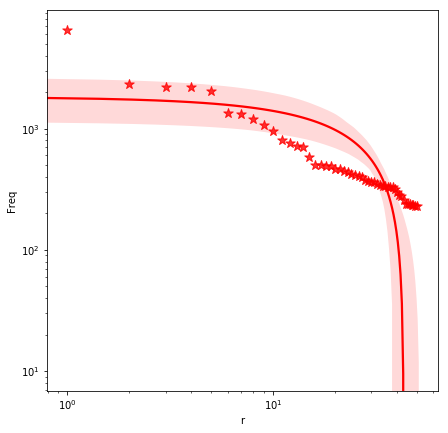

In [15]:
f, ax = matplot.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
seaborn.regplot("r", "Freq", dfTop50, ax=ax, marker="*", scatter_kws={"s": 100}, color="r")

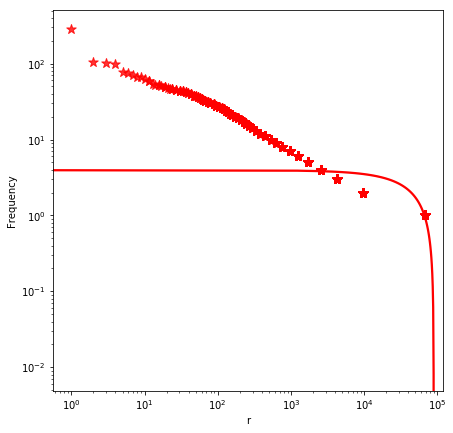

In [14]:
bigrams = []
bigrams = nltk.bigrams(textTokenized)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_df = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_df['r'] = bigrams_df['Frequency'].rank(ascending=False)

f, ax = matplot.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
seaborn.regplot("r", "Frequency", bigrams_df, ax=ax, marker="*", scatter_kws={"s": 100}, color="r")

**Q4) Reproduza a tabela 4.5 do livro texto considerando a sua coleção**


In [0]:
prop_table = pd.DataFrame()
prop_table['Number of Occurrences (n)'] = frequencyWords.values() 
prop_table = prop_table.groupby(['Number of Occurrences (n)'])['Number of Occurrences (n)'].size().reset_index(name='Actual Number of Words')
prop_table['Predicted Proportion (1/n(n+1))'] = round(1 / (prop_table['Number of Occurrences (n)']*(prop_table['Number of Occurrences (n)'] + 1)), 3)
prop_table['Actual Proportion'] = round(prop_table['Actual Number of Words'] / len(frequencyWords), 3)

prop_table = prop_table[['Number of Occurrences (n)', 'Predicted Proportion (1/n(n+1))', 'Actual Proportion', 'Actual Number of Words']]
prop_table.index += 1
prop_table.head(10)

,Number of Occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
1,1,0.500,0.518,12406
2,2,0.167,0.157,3760
3,3,0.083,0.077,1840
4,4,0.050,0.048,1148
5,5,0.033,0.033,791
6,6,0.024,0.022,529
7,7,0.018,0.017,412
8,8,0.014,0.014,334
9,9,0.011,0.012,282
10,10,0.009,0.011,255
